In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

import warnings 
warnings.filterwarnings('ignore')

### Thompson Sampling - Multi-Armed Bandits

Consider a scenario where you are staying at an unknown place for some days. There are a few restaurants in that area and there is a certain amount of happiness you get from eating food from each restaurant. The happiness is numerically given by happiness index which is assumed to be normally distributed.

In the approach, we aren't aware of the mean satisfaction that we get from restaurants and we would like to find that out and see how Thompson Sampling works with its self-correcting mechanism. However, we are going to assume some means so that we can sample accordingly for the process.

We assume the **mean happiness of restaurants** to follow normal distribution as well (prior), apart from the fact that the happiness themselves are also normally distributed (likelihood).

In [2]:
# likelihood parameters
# mean normally distributed - unknown
mean1 = 5
mean2 = 6
# variance normally distributed - known
sigma = 1

# prior parameters
# normally distributed
mu_prior = 0
sigma_prior = 100

### Conjugate Prior 

Since we have no idea about means at the starting, we assume a prior with large standard deviation, which is why, it's also called Flat Prior.

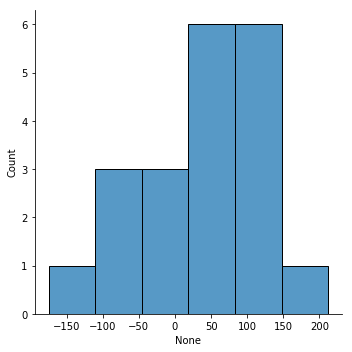

In [3]:
X = np.random.normal(mu_prior, sigma_prior, 20)
sns.displot(X)
plt.show()

As we know product of two normals is also a normal distribution, with prior and likelihood normally distributed, the posterior is also **normally distributed** with gaussian parameters:

\begin{equation}
\mu_{p} = \frac{1}{\frac{1}{\sigma_{0}^{2}}+\frac{n}{\sigma^{2}}}\left(\frac{\mu_{0}}{\sigma_{0}^{2}}+\frac{\sum_{i=1}^{n} x_{i}}{\sigma^{2}}\right)
\end{equation}

\begin{equation}
\sigma_{p}^{2} = \left(\frac{1}{\sigma_{0}^{2}}+\frac{n}{\sigma^{2}}\right)^{-1}
\end{equation}

#### Observations for posterior parameters:
1. As you visit more restaurants:
    1. Your mean is function of satisfaction received over all trips so far.
    2. Your posterior variance decreases as function of n.


In [4]:
def get_posterior_parameters(X, sigma, mu_prior, sigma_prior):
    n = len(X)
    sigma_p = np.sqrt(1 / (1 / (sigma_prior)**2 + n / (sigma)**2))
    mu_p = (mu_prior / sigma_prior**2 + np.sum(X) / sigma**2) * sigma_p**2
    return mu_p, sigma_p

def sample_point(mu1, sigma1, mu2, sigma2):
    x1 = np.random.normal(mu1, sigma1)
    x2 = np.random.normal(mu2, sigma2)
    return x1, x2

### Thompson Sampling - Bayesian approach:
1. For each iteration:
    1. Sample from posteriors for each restaurant: At first iteration with no trips done, posterior is prior
    2. Visit the restaurant with higher posterior sampled value
    3. For the restaurant visited:
        1. Add satisfaction value from true sampling distribution for the restaurant
        2. Update posterior parameters for each restaurant
2. Repeat

In [5]:
X1 = []
X2 = []
X = []
means = []

num_trips = 500

# posterior is prior till no trip is done
mu1, sigma1, mu2, sigma2 = mu_prior, sigma_prior, mu_prior, sigma_prior
for trip_idx in range(num_trips):
    # sampling from posterior
    x1, x2 = sample_point(mu1, sigma1, mu2, sigma2)

    if x1 > x2:
        x = np.random.normal(mean1, sigma)
        X1.append(x)
        mu_posterior, sigma_posterior = get_posterior_parameters(X1, sigma, mu_prior, sigma_prior)
        mu1, sigma1 = mu_posterior, sigma_posterior
    else:
        x = np.random.normal(mean2, sigma)
        X2.append(x)
        mu_posterior, sigma_posterior = get_posterior_parameters(X2, sigma, mu_prior, sigma_prior)
        mu2, sigma2 = mu_posterior, sigma_posterior
    X.append(x)
    means.append(np.mean(X))

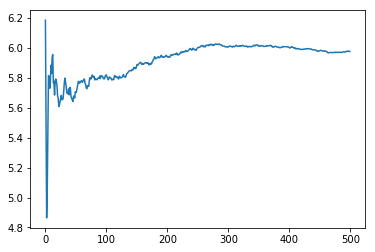

In [6]:
plt.plot(means)
plt.show()

Iteration: 20 | Mean: 5.7445
Iteration: 100 | Mean: 5.8175
Iteration: 500 | Mean: 5.9738


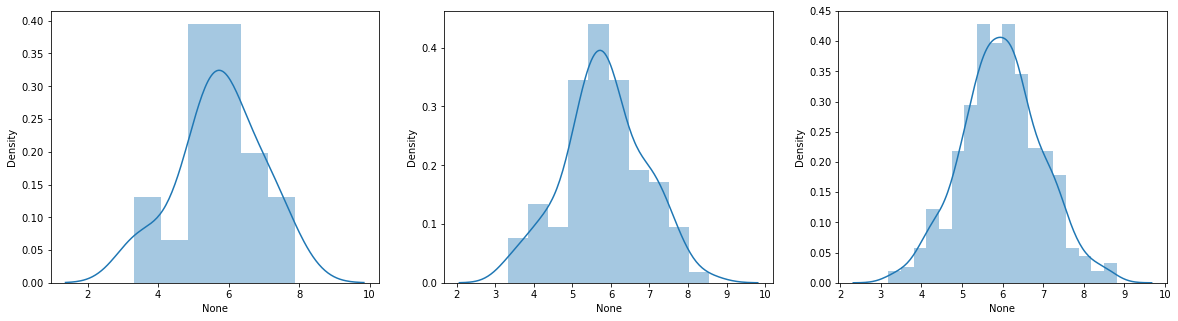

In [7]:
def plot_iteration(n_iter, X):
    sns.distplot(X[:n_iter])
    mu, sigma = norm.fit(X[:n_iter])
    print(f'Iteration: {n_iter} | Mean: {mu.round(4)}')

plt.figure(figsize=(20, 5))
plt.subplot(131)
n_iter = 20
plot_iteration(n_iter, X)

plt.subplot(132)
n_iter = 100
plot_iteration(n_iter, X)

plt.subplot(133)
n_iter = 500
plot_iteration(n_iter, X)

plt.show()

We notice how the running mean (and distribution) of happiness received from visited restaurants converges to average happiness of restaurant with higher value. So regardless of how sampling happens, we will end visiting the restaurant with higher average happiness and this is the self-correcting mechanism of Thompson Sampling.

### Limitations of Thompson Sampling
Thompson Sampling can get stuck once it has converged to the ideal distribution, and so, you are not doing much of exploration. Hence, combining Thompson Sampling with Epsilon-Greedy strategy can be viable solution to this.